# **Trabalho \#2**:  Aprendizado de Máquina e Reconhecimento de Padrões MC886/MO444

### Cabeçalho

Instituto de Computação (IC/UNICAMP), 2ᵒ Semestre, 2024

Profa. Sandra Avila, 2024s2

Trabalho proposto por Caio Petrucci Rosa (PAD), Cesar Guedes Carneiro (PED) e Sandra Avila.



In [5]:
print('231081: ' + 'Pedro da Rosa Pinheiro')
print('225334: ' + 'Jonatas de Sousa Santos')

231081: Pedro da Rosa Pinheiro
225334: Jonatas de Sousa Santos


### Importação de bibliotecas

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

pd.options.display.max_columns = None

## Objetivo

Explore os modelos de **regressão linear** e **regressão logística** e apresente o melhor modelo que você encontrar para o problema, evitando o *overfitting*. Em particular, realize predições acerca do salário dos profissionais da área de dados no Brasil, com base nos dados da pesquisa State of Data Brazil 2023, levando em consideração variáveis como perfil demográfico, formação, experiência e atuação no setor.

---

## Base de Dados

#### **Dicionário de dados:**

A base de dados deste trabalho foi criado a partir de dados disponibilizados em [State of Data Brazil 2023](https://www.kaggle.com/datasets/datahackers/state-of-data-brazil-2023). Os dados refletem a pesquisa realizada com profissionais da área de Ciência de Dados no Brasil. As respostas foram coletadas em 2023 e a base de dados contém uma ampla variedade de perguntas sobre o perfil demográfico, situação profissional e conhecimentos técnicos dessas pessoas.


* **id**: Identificador único da pessoa participante;

* **idade**: Idade da pessoa participante;

* **genero**: Gênero da pessoa participante;

* **cor_raca**: Cor/raça/etnia da pessoa participante;

* **pcd**: Se a pessoa participante possui alguma deficiência (PCD);

* **estado_residencia**: Estado onde a pessoa participante mora;

* **mudou_estado**: Se a pessoa participante mudou de estado recentemente;

* **regiao_origem**: Região de origem da pessoa participante;

* **nivel_ensino**: Nível de ensino da pessoa participante;

* **area_formacao**: Área de formação acadêmica;

* **situacao_trabalho**: Situação atual de trabalho;

* **setor**: Setor em que a pessoa participante trabalha;

* **numero_funcionarios**: Número de funcionários na empresa onde a pessoa participante trabalha;

* **gestor**: Se a pessoa participante é gestor na empresa;

* **cargo**: Cargo da pessoa participante;

* **nivel_profissional**: Nível profissional da pessoa participante;

* **tempo_exp_dados**: Tempo de experiência na área de dados;

* **tempo_exp_ti**: Tempo de experiência prévia na área de TI ou Engenharia de Software antes de atuar com dados;

* **satisfacao_empresa**: Nível de satisfação da pessoa participante com sua empresa atual;

* **forma_trabalho_atual**: Forma de trabalho atual (presencial, remoto, híbrido);

* **atuacao_dia_a_dia**: Reflexão da atuação da pessoa participante no dia a dia em relação ao cargo formal;

* **fontes_dados_analise**: Fontes de dados já analisadas ou processadas pela pessoa participante no trabalho;

* **fontes_dados_uso**: Fontes de dados mais utilizadas pela pessoa participante no trabalho;

* **linguagens_trabalho**: Linguagens de programação utilizadas no trabalho;

* **linguagem_mais_usada**: Linguagem de programação mais utilizada no trabalho;

* **linguagem_preferida**: Linguagem de programação preferida da pessoa participante;

* **bancos_dados_trabalho**: Bancos de dados utilizados no trabalho;

* **cloud_preferida**: Cloud preferida da pessoa participante;

* **cloud_usada**: Cloud usada no trabalho;

* **ferramenta_bi_dia_a_dia**: Ferramenta de BI utilizada no dia a dia;

* **ferramenta_bi_preferida**: Ferramenta de BI preferida;

* **tipo_uso_ai**: Tipo de uso de AI Generativa e LLMs na empresa;

* **uso_chatgpt**: Se a pessoa participante utiliza ChatGPT ou LLMs no trabalho;

* **faixa_salarial**: Faixa salarial da pessoa participante;

* **salario**: Valor do salário da pessoa participante.


Você deve **respeitar a seguinte divisão de treino/teste**:

    train_data.csv
    test_data.csv

Lembre-se de criar **seu próprio conjunto de validação**, a partir um subconjunto do conjunto de treinamento, e utilize o conjunto de teste (a ser disponibilizado) apenas para inferência e relato do resultado final.

### Atividades

#### 1. (0,4 pontos) Realize a limpeza e preparação dos dados de treinamento.

  > **Considere os seguintes fatores:**
  > - Existem outliers nos dados? Se sim, como você pretende tratá-los (removê-los, ajustá-los, ou usar uma abordagem alternativa)?
  > - Há valores ausentes? Se sim, como irá lidar com eles? (Ex.: exclusão de linhas, preenchimento por média/mediana/moda, ou outros métodos).
  > - Como você planeja tratar variáveis categóricas? (Ex.: one-hot encoding, label encoding, ou outra estratégia).

In [58]:
# Carregando dados
df_raw = pd.read_csv("train_data.csv")

# removendo features não relevantes
df= df_raw.drop(["id"], axis=1)

In [ ]:
# preenchendo valores NaN
df["nivel_profissional"].fillna(df["nivel_profissional"].value_counts().index[0], inplace=True)

# realizando one hot encoding
encoder = OneHotEncoder(sparse_output=False)

categorical_cols = ["cor_raca", "estado_residencia", "nivel_ensino", "area_formacao", "situacao_trabalho", "setor", "atuacao_dia_a_dia", "cargo"]
encoded = encoder.fit_transform(df[categorical_cols])
df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

df = pd.concat([df, df_encoded], axis=1)
df.drop(categorical_cols, axis=1, inplace=True)


# renomeando features com nomes longos/não formatados
df.rename(columns={"setor_Tecnologia/Fábrica de Software": "setor_Tech/Fábrica",
                        "setor_Área da Saúde": "setor_Saude",
                        "setor_Área de Consultoria": "setor_Consultoria",
                        "atuacao_dia_a_dia_*Análise de Dados/BI:* Extrai e cruza dados unindo diferentes fontes da informação; analisa dados visando identificar padrões, gerar insights e levantar perguntas; desenvolve dashboards, relatórios e visualizações de dados em ferramentas de BI.": "atuacao_dia_a_dia_AD/BI",
                        "atuacao_dia_a_dia_*Ciência de Dados/Machine Learning/AI: *Desenha e executa experimentos com o objetivo de responder perguntas do negócio; desenvolve modelos preditivos e algoritmos de Machine Learning com o objetivo de otimizar e automatizar a tomada de decisão.": "atuacao_dia_a_dia_DS/ML/AI",
                        "atuacao_dia_a_dia_*Engenharia de Dados:* Modela soluções de arquitetura de dados; define modelagens de repositórios de dados (Data Lake, Data Warehouse, Data Lakehouse); desenvolve estratégias de aquisição de dados, recuperação de informação e pipelines de dados.": "atuacao_dia_a_dia_Engenharia",
                        "atuacao_dia_a_dia_Não atuo em nenhuma das frentes citadas.": "atuacao_dia_a_dia_Unknown",
                        "cor_raca_Prefiro não informar": "cor_raca_Unknown",
                        "estado_residencia_Acre (AC)": "estado_residencia_AC",
                        "estado_residencia_Alagoas (AL)": "estado_residencia_AL",
                        "estado_residencia_Amapá (AP)": "estado_residencia_AP",
                        "estado_residencia_Amazonas (AM)": "estado_residencia_AM",
                        "estado_residencia_Bahia (BA)": "estado_residencia_BA",
                        "estado_residencia_Ceará (CE)": "estado_residencia_CE",
                        "estado_residencia_Distrito Federal (DF)": "estado_residencia_DF",
                        "estado_residencia_Espírito Santo (ES)": "estado_residencia_ES",
                        "estado_residencia_Goiás (GO)": "estado_residencia_GO",
                        "estado_residencia_Maranhão (MA)": "estado_residencia_MA",
                        "estado_residencia_Mato Grosso (MT)": "estado_residencia_MT",
                        "estado_residencia_Mato Grosso do Sul (MS)": "estado_residencia_MS",
                        "estado_residencia_Minas Gerais (MG)": "estado_residencia_MG",
                        "estado_residencia_Paraná (PR)": "estado_residencia_PR",
                        "estado_residencia_Paraíba (PB)": "estado_residencia_PB",
                        "estado_residencia_Pará (PA)": "estado_residencia_PA",
                        "estado_residencia_Pernambuco (PE)": "estado_residencia_PE",
                        "estado_residencia_Piauí (PI)": "estado_residencia_PI",
                        "estado_residencia_Rio Grande do Norte (RN)": "estado_residencia_RN",
                        "estado_residencia_Rio Grande do Sul (RS)": "estado_residencia_RS",
                        "estado_residencia_Rio de Janeiro (RJ)": "estado_residencia_RJ",
                        "estado_residencia_Rondônia (RO)": "estado_residencia_RO",
                        "estado_residencia_Santa Catarina (SC)": "estado_residencia_SC",
                        "estado_residencia_Sergipe (SE)": "estado_residencia_SE",
                        "estado_residencia_São Paulo (SP)": "estado_residencia_SP",
                        "estado_residencia_Tocantins (TO)": "estado_residencia_TO",
                        "nivel_ensino_Doutorado ou PHD": "nivel_ensino_Doutorado/PHD",
                        "nivel_ensino_Estudante de Graduação": "nivel_ensino_Estudante",
                        "nivel_ensino_Não tenho graduação formal": "nivel_ensino_SemGrad",
                        "nivel_ensino_Prefiro não informar": "nivel_ensino_Unknown"}, inplace=True)

# realizando label encoding
label_encoder = LabelEncoder()
df["genero"] = label_encoder.fit_transform(df["genero"])
df["pcd"] = label_encoder.fit_transform(df["pcd"])

# realizando ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=[["Júnior", "Pleno", "Sênior"]])
df["nivel_profissional"] = ordinal_encoder.fit_transform(df[["nivel_profissional"]])

ordinal_encoder = OrdinalEncoder(categories=[['Não tenho experiência na área de dados', 'Menos de 1 ano', 'de 1 a 2 anos', 'de 3 a 4 anos', 'de 4 a 6 anos', 'de 5 a 6 anos', 'de 7 a 10 anos', 'Mais de 10 anos']])
df["tempo_exp_dados"] = ordinal_encoder.fit_transform(df[["tempo_exp_dados"]])

ordinal_encoder = OrdinalEncoder(categories=[['Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados', 'Menos de 1 ano', 'de 1 a 2 anos', 'de 3 a 4 anos', 'de 5 a 6 anos', 'de 7 a 10 anos', 'Mais de 10 anos']])
df["tempo_exp_ti"] = ordinal_encoder.fit_transform(df[["tempo_exp_ti"]])

ordinal_encoder = OrdinalEncoder(categories=[['de R$ 101/mês a R$ 2.000/mês', 'Menos de R$ 1.000/mês', 'de R$ 1.001/mês a R$ 2.000/mês', 'de R$ 2.001/mês a R$ 3.000/mês', 'de R$ 3.001/mês a R$ 4.000/mês', 'de R$ 4.001/mês a R$ 6.000/mês', 'de R$ 6.001/mês a R$ 8.000/mês', 'de R$ 8.001/mês a R$ 12.000/mês', 'de R$ 12.001/mês a R$ 16.000/mês', 'de R$ 16.001/mês a R$ 20.000/mês', 'de R$ 20.001/mês a R$ 25.000/mês', 'de R$ 25.001/mês a R$ 30.000/mês', 'de R$ 30.001/mês a R$ 40.000/mês', 'Acima de R$ 40.001/mês']])
df["faixa_salarial"] = ordinal_encoder.fit_transform(df[["faixa_salarial"]])

# normalizando dados
min_max_scaler = MinMaxScaler()
df_temp = df
df = pd.DataFrame(min_max_scaler.fit_transform(df.drop(["salario", "faixa_salarial"], axis=1)), index=df.index, columns=df.drop(["salario", "faixa_salarial"], axis=1).columns)
df["salario"] = df_temp["salario"]
df["faixa_salarial"] = df_temp["faixa_salarial"]

print(df.shape)



2. (0,5 pontos) Faça uma análise exploratória de dados.

  > Procure entender como os dados se comportam e as relações entre diferentes *features*.
  >
  > **Alguns fatores a serem considerados:** Quais as distribuição dos valores de cada atributos? Como é a correlação entre os diferentes atributos? Existe multicolinearidade entre algumas *features*?

In [8]:
# TODO: Análise exploratória dos dados

# df_proc.corr()

3. (0,1 pontos) Divida o seu conjunto de treinamento em dois conjuntos: treinamento e validação. A proporção de divisão pode ser escolhida, mas pense no impacto que isso pode resultar em seu modelo.

  > **Dica:** Defina uma *seed* para seus resultados serem reprodutíveis.

In [46]:
# TODO: Divisão de treinamento e validação
df.insert(0, "bias", [1] * df.shape[0])
y = df["salario"].to_numpy()
X = df.drop(["salario"], axis=1).to_numpy()
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)

## Regressão Linear


Esta parte do trabalho visa prever o valor do salário dos profissionais, descrita pelo atributo `salario`, com base em seus dados demográficos e informações de carreira.

O atributo alvo nesta etapa é o atributo `salario`. Portanto, não utilize os atributos `salario` e `faixa_salarial` como *features* dos seus modelos, apenas para o cálculo da função de custo durante o treinamento e a validação.

### Atividades

#### 1. (0,1 pontos) Faça a seleção das features mais importantes para o treinamento da sua regressão linear, com base em sua análise exploratória.

In [10]:
#TODO: Seleção de features.

# Seleção já realizada na etapa de pré-processamento

#### 2. (1,75 pontos) Implemente e execute a regressão linear.

  Faça uma classe `LinearRegression` capaz de encontrar uma regressão utilizando dois métodos: **descida do gradiente** e a **equação normal**.

  Para a otimização por **descida do gradiente**, guarde o histórico da função de custo por época e retorno este histórico após a execução do ajuste. Além disso, utilize uma learning rate de `0.01` nesta etapa.

  > **Observações:** Inicie randomicamente sua regressão linear e lembre-se de não utilizar dados de teste no treinamento.

  Lembre-se que:

  > A hipótese da regressão linear é: $ h_\theta(x) = \theta^Tx$.
  >
  > E, o objetivo da regressão linear é minimizar a função de custo Root Mean Squared Error (RMSE):
  >
  > $$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $$
  >
  > Para minimizar o custo $J(\theta)$, o algoritmo de descida do gradiente realiza uma atualização nos parâmetros do modelo a cada iteração:
  >
  > $$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta) = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$
  >
  > onde $j$ é o índice do parâmetro a ser atualizado (atualizando simultaneamente $\theta_j$ para todos os $j$) e $\alpha$ é a taxa de aprendizado.

In [28]:
# TODO: Regressão Linear. Implemente sua solução. Você não pode usar bibliotecas como scikit-learn, Keras/TensorFlow, ou PyTorch.

class LinearRegression:
    def __init__(self, X, y) -> None:
        self.X = X
        self.y = y
        pass

    def fit(self, method: str =None, **kwargs):
        if method == "gradient_descent":
            return self.fit_gradient_descent_solve(**kwargs)
        else:
            return self.fit_analytical_solve()

    def fit_analytical_solve(self):
        Xt = np.transpose(self.X)
        feature_prod = np.matmul(Xt, self.X)

        # if (np.linalg.det(feature_prod) == 0):
        #     raise Exception("Matriz não invertível na solução analítica. Favor checar redundância dos features.")
        
        inv_prod = np.linalg.inv(feature_prod)
        z = np.matmul(inv_prod, Xt)
        theta = np.matmul(z, self.y)

        return theta
    
    def error_derivative(self, batch_size: int, theta: np.array):
        random_idx = np.random.choice(self.X.shape[0], size=batch_size)
        X_batch = self.X[random_idx]
        y_batch = self.y[random_idx]

        y_predict = X_batch @ theta
        error = np.sum((y_batch - y_predict) ** 2) / (2 * batch_size)
        error_d = X_batch.T @ (y_predict - y_batch) / batch_size

        return error, error_d

    def fit_gradient_descent_solve(self, epochs: int, batch_size: int, alpha: float = 0.01):
        theta = np.random.rand(self.X.shape[1])
        epochs_error = []

        for idx_epoch in range(epochs):
            for _ in range(self.X.shape[0] // batch_size):
                error, error_d = self.error_derivative(batch_size, theta)
                theta -= alpha * error_d
            epochs_error.append(error)
        
        return theta, epochs_error

In [53]:
X = np.random.rand(10000)
X = X.reshape((10000, 1))
X = np.hstack((np.ones(10000).reshape(10000, 1), X))
y = 2* X[:,1] + 5

# lr = LinearRegression(X_train, y_train)
lr = LinearRegression(X, y)

theta_analytic = lr.fit()
theta, epochs_error = lr.fit(method="gradient_descent", epochs=10000, batch_size=261)

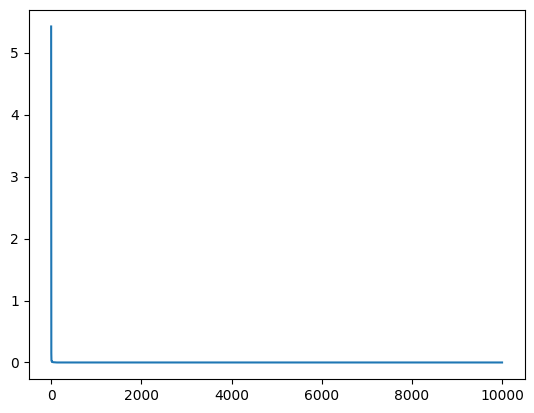

In [54]:
import matplotlib.pyplot as plt
plt.plot(epochs_error)

> **Quais foram suas conclusões? (1-2 parágrafos)**




*Escreva as conclusões aqui.*

3. (0,75 pontos) Experimente diferentes valores de *learning rates* para a descida de gradiente (GD). Plote o histórico da função de custo (função de custo vs. número de épocas) no conjunto de treinamento e no de validação para cada experimento.



In [14]:
# TODO: Descida do gradiente (GD) com 3 diferentes learning rates.

> **Quais foram suas conclusões? (1-2 parágrafos)**




*Escreva as conclusões aqui.*

 4. (0,25 pontos) Compare o seu melhor experimento baseado em GD com a sua implementação da equação normal.

In [15]:
# TODO: Compare as implementações

> **Quais foram suas conclusões? (1-2 parágrafos)**




*Escreva as conclusões aqui.*

5. (1,25 pontos) Implementa e execute duas regressões lineares utilizando sklearn:

  1. Execute uma regressão com `sklearn.linear_model.SGDRegressor`, que utiliza descida do gradiente minimizando uma função de custo regularizada.
  2. Execute uma regressão com `sklearn.linear_model.LinearRegression`, que utiliza o método da equação normal.

  Compare os resultados obtidos com as suas implementações (de GD e da equação normal).

  Ou seja, compare o `sklearn.linear_model.SGDRegressor` com a sua implementação da descida do gradiente e o `sklearn.linear_model.LinearRegression` com a sua implementação da equação normal.

  > **Observação:** Utilize uma learning rate igual a algum dos experimentos que já fez para realizar uma comparação justa.


In [16]:
# TODO: Regressão Linear. Faça a regressão novamente, agora utilizando o sklearn.linear_model.SGDRegressor e sklearn.linear_model.LinearRegression.

> **Quais foram suas conclusões? (1-2 parágrafos)**




*Escreva as conclusões aqui.*

6. (0,4 ponto) Às vezes, precisamos de alguma função mais complexa para fazer uma boa predição. Elabore e avalie um modelo de Regressão Polinomial.

In [17]:
# TODO: Regressão polinomial. Está liberado utilizar scikit-learn.

> **Quais foram suas conclusões? (1-2 parágrafos)**




*Escreva as conclusões aqui.*

## Regressão Logística

Esta parte do trabalho visa prever a faixa salarial dos profissionais, descrita pelo atributo `faixa_salarial`, com base em seus dados demográficos e informações de carreira. Portanto, não utilize os atributos `salario` e `faixa_salarial` como *features* dos seus modelos, apenas para o cálculo da função de custo durante o treinamento e a validação.

### Atividades

#### 1. (0,1 pontos) Faça a seleção das features mais importantes para o treinamento da sua regressão logística, com base em sua análise exploratória.

In [18]:
# TODO: Selecione de features.

#### 2. (1,0 pontos) Faça uma Regressão Logística Multinomial. Ela é uma generalização da Regressão Logística para o caso em que queremos lidar com várias classes.

    Use a classe `sklearn.linear_model.SGDClassifier`, passando o parâmetro `loss="log_loss"` no construtor, para criar uma Regressão Logística a ser otimizada por descida do gradiente.

    Experimente diferentes valores de learning rate e avalie o impacto desse hiperparâmetro no treinamento do modelo.

In [19]:
# TODO: Regressão logística multinomial. Utilize a classe sklearn.linear_model.SGDClassifier do scikit-learn.

> **Quais foram suas conclusões? (1-2 parágrafos)**




*Escreva as conclusões aqui.*

3. (0,75 ponto) Faça um gráfico da função de custo vs. número de épocas, em relação ao conjunto de treinamento e ao conjunto de validação. Também faça um gráfico, de mesma estrutura, descrevendo a acurácia vs. número de época.

    Como é o comportamento do modelo? O modelo está aprendendo?

In [20]:
# TODO: Plote os gráficos de loss / acurácia vs. número de épocas. Você pode usar as bibliotecas scikit-learn, seaborn, matplotlib, etc.

> **Quais foram suas conclusões? (1-2 parágrafos)**




*Escreva as conclusões aqui.*

4. (0,9 pontos) Faça pelo menos 2 gráficos que visualizem as fronteiras de decisão entre duas *features*. Por exemplo, você pode fazer um gráfico da fronteira de decisão entre os atributos `tempo_exp_dados` e `satisfacao_empresa`, caso tenha utilizado essas *features*. Verifique se está fazendo o plot para atributos relevantes utilizados em seu modelo.

    > **Observação:** [Este tutorial](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_iris.html#sphx-glr-auto-examples-linear-model-plot-sgd-iris-py) do scikit-learn demonstra como extrair essas informações do `sklearn.linear_model.SGDClassifier`.

In [21]:
# TODO: Faça a visualização das fronteiras de decisão. Você pode usar as bibliotecas scikit-learn, seaborn, matplotlib, etc.

> **Quais foram suas conclusões? (1-2 parágrafos)**




*Escreva as conclusões aqui.*

5. (0,75 pontos) Avalie os resultados do seu modelo, utilizando métricas de classificação que achar relevante. Plote a matriz de confusão e analise os resultados.

In [22]:
# TODO: Avalie o seu modelo de classificação. Você pode usar as bibliotecas scikit-learn, seaborn, matplotlib, etc.

> **Quais foram suas conclusões? (1-2 parágrafos)**


*Escreva as conclusões aqui.*

## Submissão dos resultados no Kaggle

Para avaliar o desempenho do seu modelo, você deve submeter suas predições, no conjunto de teste, na competição [Tarefa #2 de MC886/MO444 2024S2](https://www.kaggle.com/t/20fa042c08f5453abd89d946468bd3de) do Kaggle.

A plataforma calculará automaticamente a métrica de avaliação e fornecerá um score.

> **Observação:** Não se preocupe apenas com o resultado do seu modelo. O seu score no placar não irá influenciar a sua nota nesta atividade :).

### Atividades

1. (1,0 pontos) Escolha **seus melhores modelos** para as duas tarefas feitas (regressão e classificação) e faça a predição dos atributos `salario` e `faixa_salarial` com base nos dados da pesquisa contidos no **conjunto de teste**.

  **Gere um arquivo de submissão, de tipo CSV, no formato adequado:** Gere uma linha por pessoa no conjunto de teste, com as duas colunas para os valores preditos, que devem estar nomeadas como **`salario`** e **`faixa_salarial`**.

  > Exemplo de arquivo (com o cabeçalho e conteúdo formatados):
  > ```
  > id, salario, faixa_salarial
  > 1, 0.0, "de R$ 0/mês a R$ 0/mês"
  > 2, 0.0, "de R$ 0/mês a R$ 0/mês"
  > 3, 0.0, "de R$ 0/mês a R$ 0/mês"
  > ```

  Submeta suas predições na competição [Tarefa #2 de MC886/MO444 2024S2](https://www.kaggle.com/t/20fa042c08f5453abd89d946468bd3de) no Kaggle.

  Conte para a gente! Qual foi o resultado que você obteve na competição? :)

*Conte aqui :)*

## Informações sobre prazo e envio

### Prazo

09 de outubro, quarta-feira, 23:59.

Política de penalidade para submissões atrasadas: Você não está sendo encorajada(o) a submeter o trabalho depois da data de submissão. Entretanto, caso isso aconteça, a nota será penalizada da seguinte forma:
- 10 de outubro, 23:59: nota * 0,75
- 11 de outubro, 23:59: nota * 0,5
- 12 de outubro, 23:59: nota * 0,25


### Envio

No Google Classroom, envie seu Jupyter Notebook, no formato RA1_RA2_2024s2_mc886mo444_tarefa_02.ipynb.

**Esta atividade NÃO é individual, deve ser realizada em dupla (grupo de duas pessoas).**
